In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正向显示负号
import helper

In [2]:
hlp = helper.Helper()

函数包括Judge(X,y,w)、data(N, d, data_range, w_f, seed)、plot_helper(X, y, w_g, w_f)


In [3]:
def PLA(X, y, r=1):
    """
    利用PLA更新，如果r=1，则顺序取点，否则随机取点
    """

    iters = 0 #记录次数
    
    w = np.zeros(X.shape[1]) #初始化w = [0,0,0]
    n = X.shape[0] #数据数量
    
    if r == 1:
        while hlp.Judge(X, y, w) == 0:
            for i in range(n):
                if X[i,:].dot(w) * y[i] <= 0:
                    w += y[i] * X[i,:]
                    iters += 1

    else:
        while hlp.Judge(X, y, w) == 0:
            i = np.random.randint(0,N)
            if X[i,:].dot(w) * y[i] <= 0:
                w += y[i] * X[i,:]
                iters += 1
    
    print('共经过了{}次迭代,'.format(iters) + '最终的w为:',w)
    return w

In [4]:
w_f = [-5, 1, 1]
data_range = [2, 3]
X, y = hlp.data(100, 2, data_range, w_f, 1126)

共经过了2979次迭代,最终的w为: [-99.          19.79731078  19.75051272]


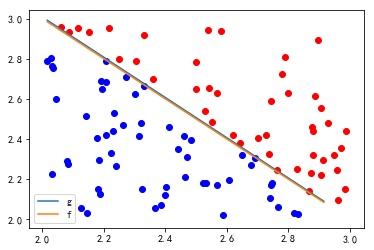

In [5]:
w_g = PLA(X, y)
hlp.plot_helper(X, y, w_g, w_f)

* 用iris数据试试

In [6]:
import pandas as pd
from sklearn.datasets import load_iris

In [7]:
#load_data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [12]:
X_iris = np.array(df)[:100, [0, 1]]
X_iris = np.c_[np.ones(X_iris.shape[0]), X_iris]
y_iris = np.array(df)[:100, -1]
y_iris = np.array([1 if i==1 else -1 for i in y_iris])

In [13]:
w_g = PLA(X_iris, y_iris)

共经过了1562次迭代,最终的w为: [-126.    79.8 -101.4]


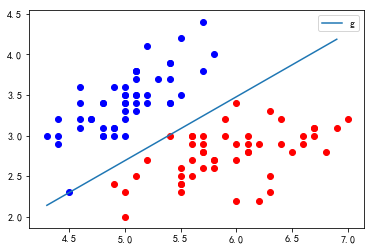

In [14]:
hlp.plot_helper(X_iris, y_iris, w_g)